In [49]:
from copy import deepcopy

import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from pgmpy.estimators import BicScore, BDeuScore, HillClimbSearch, K2Score, MmhcEstimator, PC
from pgmpy.models import BayesianModel

sys.path.append('../')
import src.utils as utils
from src.hidden_prints import HiddenPrints, RedirectOutput
from src.model import BayesianNetworkModel

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

## Load and prepare data

In [81]:
data = utils.load_data()
data = utils.split_data(data)

In [82]:
data_copy = deepcopy(data)

continuous_attrs = ['wife_age', 'n_children']
data = utils.discretize_data(
    data=data, 
    continuous_attrs=continuous_attrs,
    n_bins=5
)

X_train = data['train']['X']
y_train = data['train']['y']
X_test = data['test']['X']
y_test = data['test']['y']

train_ds = pd.concat([X_train, y_train], axis=1)
test_ds = pd.concat([X_test, y_test], axis=1)

nodes = [
    'wife_age', 'wife_edu', 'husband_edu', 'n_children', 'wife_religion', 
    'wife_working', 'husband_occup', 'sol_index', 'media_exposure', 
    'class'
]

## Prepare networks

### Own network proposals

---- Network 1 ----


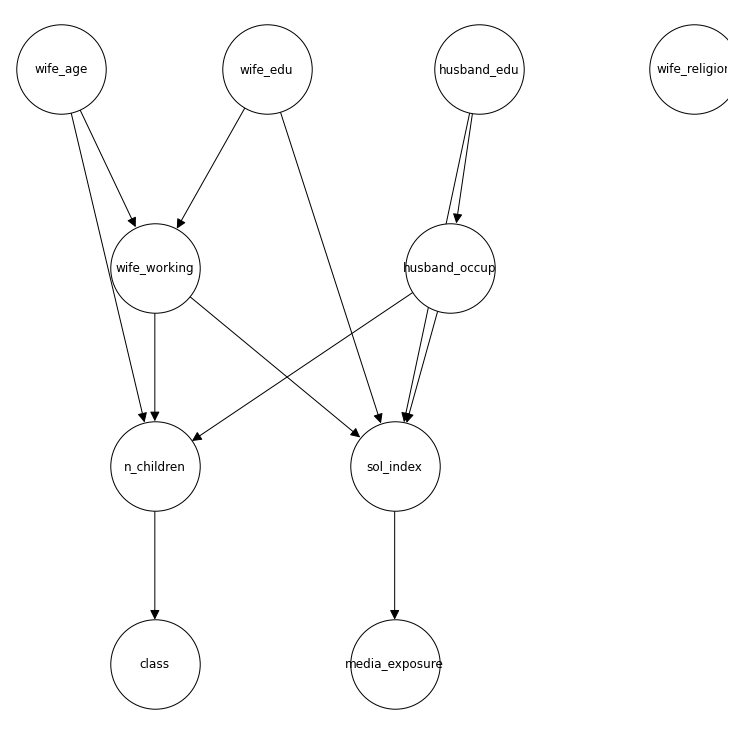

---- Network 2 ----


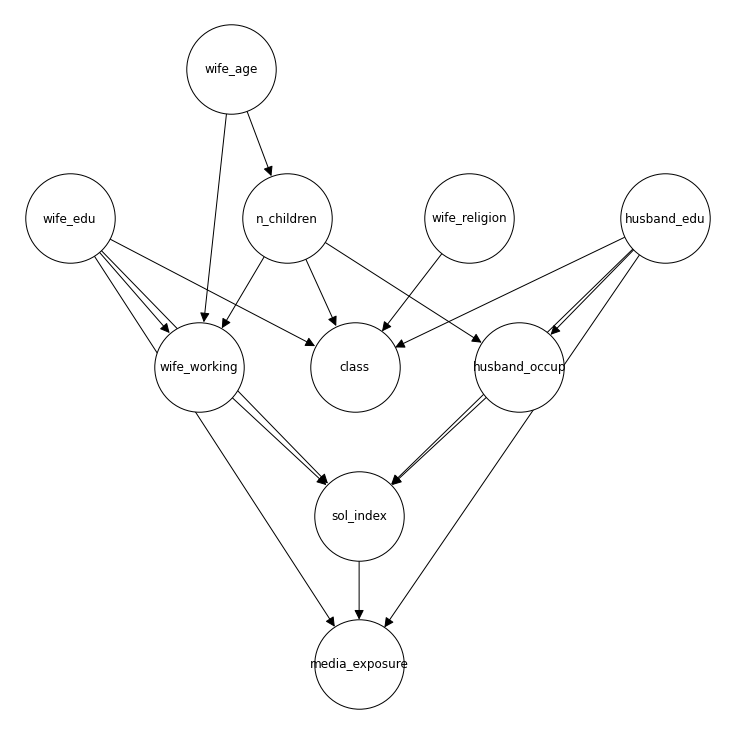

---- Network 3 ----


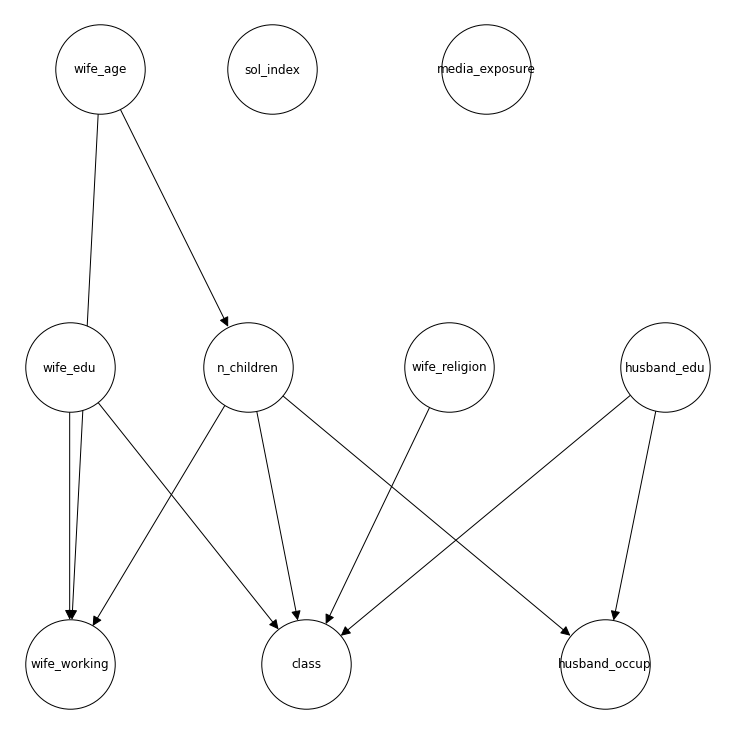

---- Network 4 ----


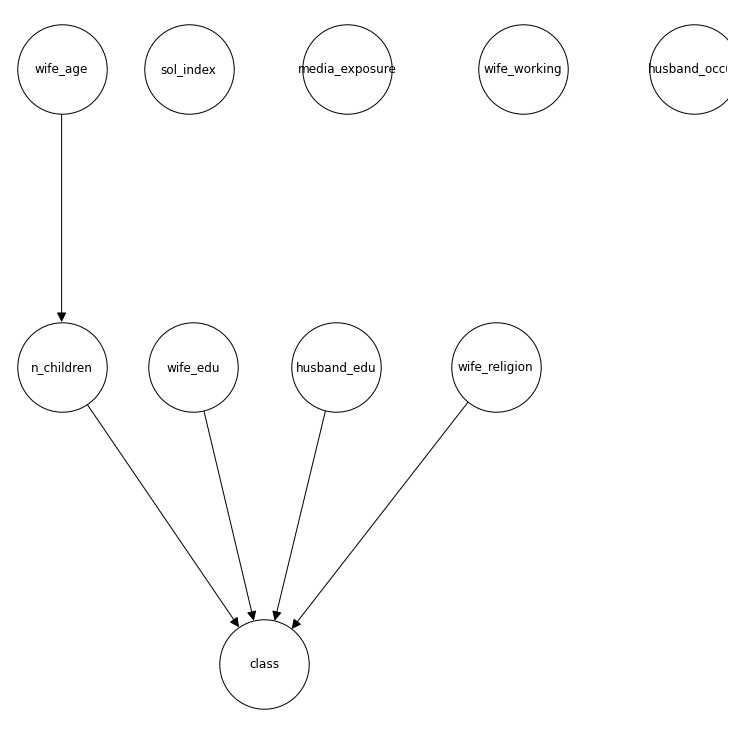

---- Network 5 ----


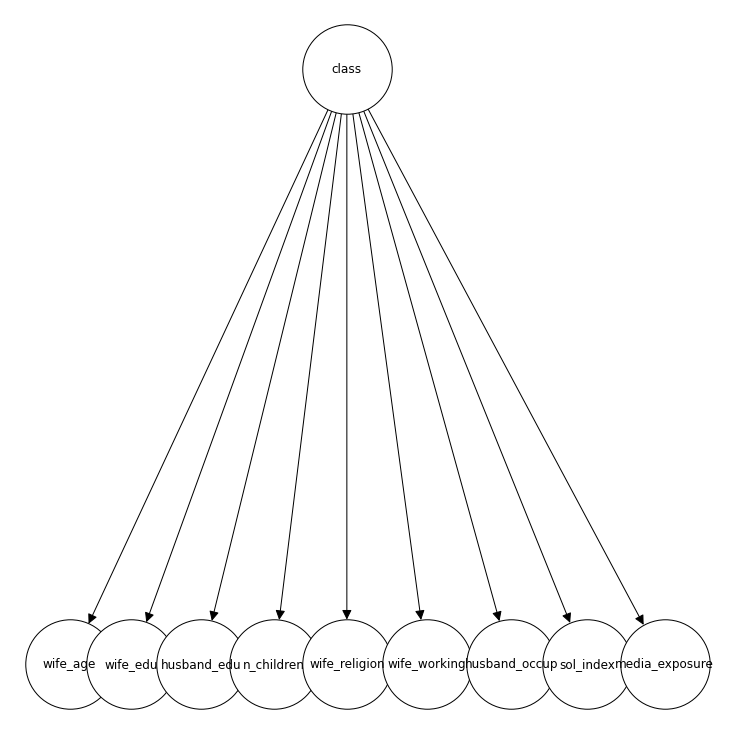

In [54]:
# [
#     'wife_age', 'wife_edu', 'husband_edu', 'n_children', 'wife_religion', 
#     'wife_working', 'husband_occup', 'sol_index', 'media_exposure', 
#     'class'
# ]


# ---- Network 1 ----
print('---- Network 1 ----')
network_1 = BayesianModel([
    ('wife_age','n_children'), ('wife_age','wife_working'), 
    ('wife_edu','wife_working'), ('wife_edu','sol_index'), 
    ('husband_edu','husband_occup'), ('husband_edu','sol_index'), 
    ('n_children','class'), 
    ('wife_working','n_children'), ('wife_working','sol_index'), 
    ('husband_occup','n_children'), ('husband_occup','sol_index'), 
    ('sol_index','media_exposure'), 
])
network_1.add_node('wife_religion')

utils.plot_network(network_1)
#               precision    recall  f1-score   support
#            1       0.47      0.79      0.59       126
#            2       0.00      0.00      0.00        67
#            3       0.38      0.32      0.35       102

#     accuracy                           0.45       295
#    macro avg       0.29      0.37      0.31       295
# weighted avg       0.33      0.45      0.37       295


# ---- Network 2 ----
print('---- Network 2 ----')
network_2 = BayesianModel([
    ('wife_age','n_children'), ('wife_age','wife_working'), 
    ('wife_edu','wife_working'), ('wife_edu','sol_index'), ('wife_edu','media_exposure'), ('wife_edu','class'),
    ('husband_edu','husband_occup'), ('husband_edu','sol_index'), ('husband_edu','media_exposure'), ('husband_edu','class'),
    ('n_children','wife_working'), ('n_children','husband_occup'), ('n_children','class'), 
    ('wife_religion','class'), 
    ('wife_working','sol_index'), 
    ('husband_occup','sol_index'), 
    ('sol_index','media_exposure'),
])

utils.plot_network(network_2)
#               precision    recall  f1-score   support
#            1       0.48      0.80      0.60       126
#            2       0.53      0.25      0.34        67
#            3       0.45      0.24      0.31       102

#     accuracy                           0.48       295
#    macro avg       0.49      0.43      0.42       295
# weighted avg       0.48      0.48      0.44       295


# ---- Network 3 ----
print('---- Network 3 ----')
network_3 = BayesianModel([
    ('wife_age','n_children'), ('wife_age','wife_working'), 
    ('wife_edu','wife_working'), ('wife_edu','class'),
    ('husband_edu','husband_occup'), ('husband_edu','class'),
    ('n_children','wife_working'), ('n_children','husband_occup'), ('n_children','class'), 
    ('wife_religion','class'), 
])
network_3.add_node('sol_index')
network_3.add_node('media_exposure')

utils.plot_network(network_3)
#               precision    recall  f1-score   support
#            1       0.48      0.80      0.60       126
#            2       0.53      0.25      0.34        67
#            3       0.45      0.24      0.31       102

#     accuracy                           0.48       295
#    macro avg       0.49      0.43      0.42       295
# weighted avg       0.48      0.48      0.44       295


# ---- Network 4 ----
print('---- Network 4 ----')
network_4 = BayesianModel([
    ('wife_age','n_children'), 
    ('wife_edu','class'),
    ('husband_edu','class'),
    ('n_children','class'), 
    ('wife_religion','class'), 
])
network_4.add_node('sol_index')
network_4.add_node('media_exposure')
network_4.add_node('wife_working')
network_4.add_node('husband_occup')

utils.plot_network(network_4)
#               precision    recall  f1-score   support
#            1       0.48      0.80      0.60       126
#            2       0.53      0.25      0.34        67
#            3       0.45      0.24      0.31       102

#     accuracy                           0.48       295
#    macro avg       0.49      0.43      0.42       295
# weighted avg       0.48      0.48      0.44       295


# ---- Network 5 (NaiveBayes) ----
print('---- Network 5 ----')
network_5 = BayesianModel()
for col in list(X_train.columns):
    network_5.add_edge('class', col)

utils.plot_network(network_5)
#               precision    recall  f1-score   support
#            1       0.64      0.60      0.62       126
#            2       0.37      0.51      0.43        67
#            3       0.45      0.38      0.41       102

#     accuracy                           0.50       295
#    macro avg       0.49      0.50      0.49       295
# weighted avg       0.51      0.50      0.50       295

### HillClimbSearch (Tabu Search)

  0%|          | 19/1000000 [00:01<20:34:29, 13.50it/s]
---- Network hcs_bic ----


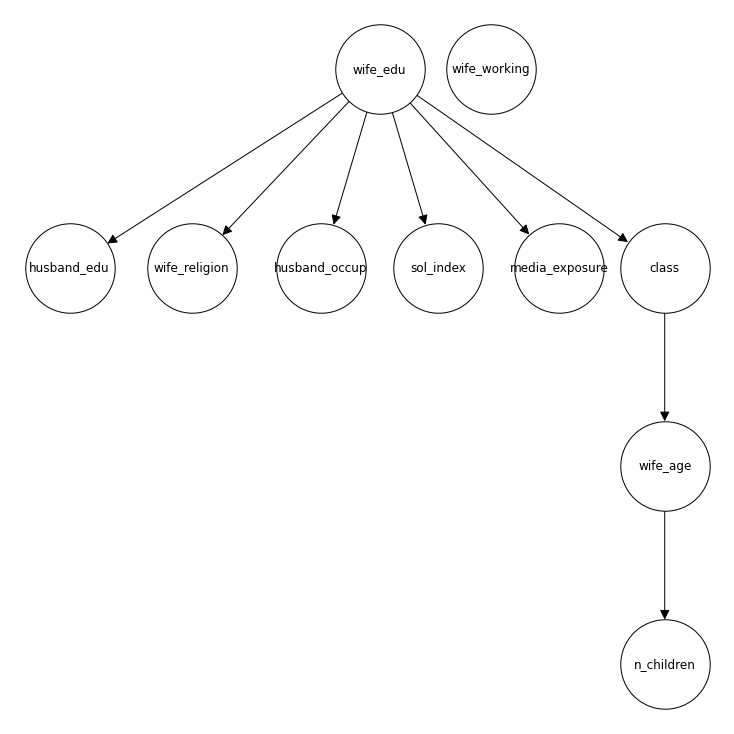

---- Network hcs_bdeu ----


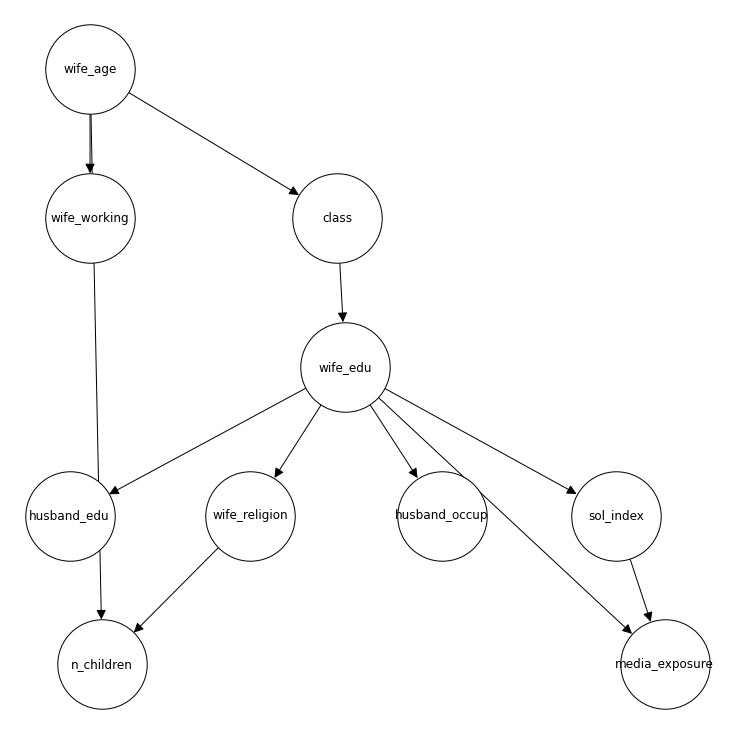

---- Network hcs_k2 ----


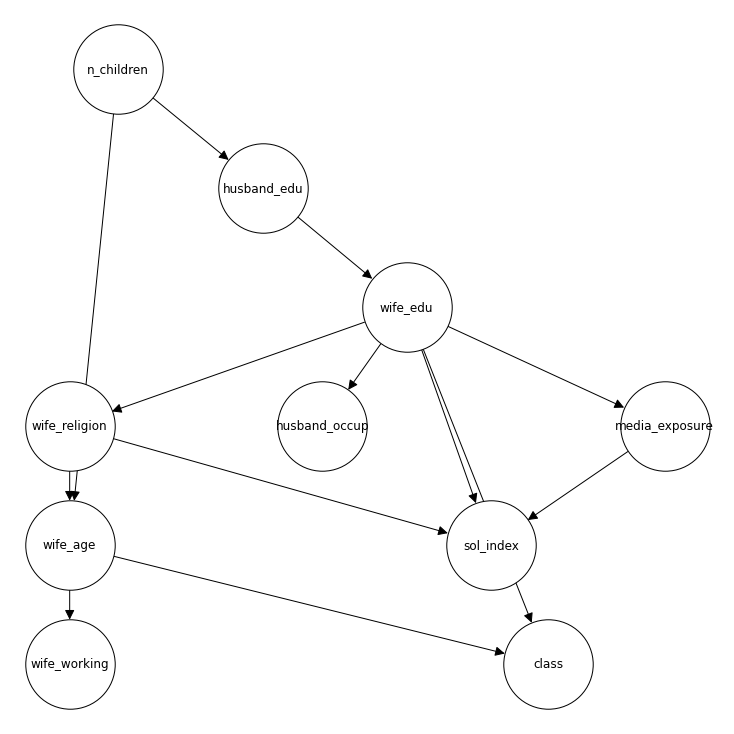

In [89]:
est = HillClimbSearch(train_ds)
hcs_bic = est.estimate(scoring_method=BicScore(train_ds))
hcs_bdeu = est.estimate(scoring_method=BDeuScore(train_ds))
hcs_k2 = est.estimate(scoring_method=K2Score(train_ds))


own_network_proposals = [
    network_1, network_2, network_3, 
    network_4, network_5
]

hc_own_networks = []
for own_network in own_network_proposals:
    hc_own_networks.append(
        est.estimate(scoring_method=K2Score(train_ds), start_dag=own_network)
    )

# ---- Network hcs_bic ----
print('---- Network hcs_bic ----')
utils.plot_network(hcs_bic)

# ---- Network hcs_bdeu ----
print('---- Network hcs_bdeu ----')
utils.plot_network(hcs_bdeu)

# ---- Network hcs_k2 ----
print('---- Network hcs_k2 ----')
utils.plot_network(hcs_k2)

### PC algorithm

Working for n conditional variables: 5: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


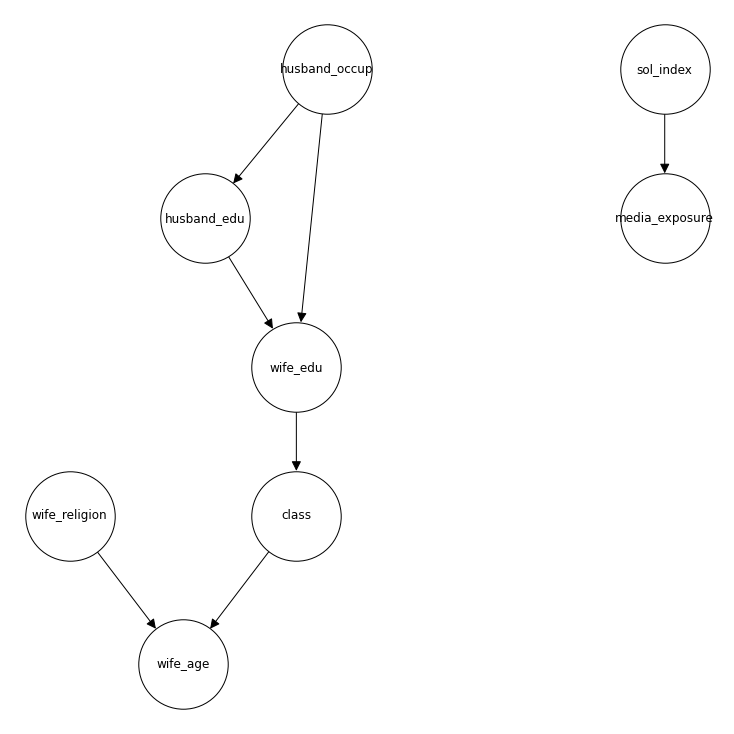

In [60]:
est = PC(train_ds)
pc_network = est.estimate()

utils.plot_network(pc_network)

### Hybrid

  0%|          | 1/1000000 [00:00<44:37:05,  6.23it/s]


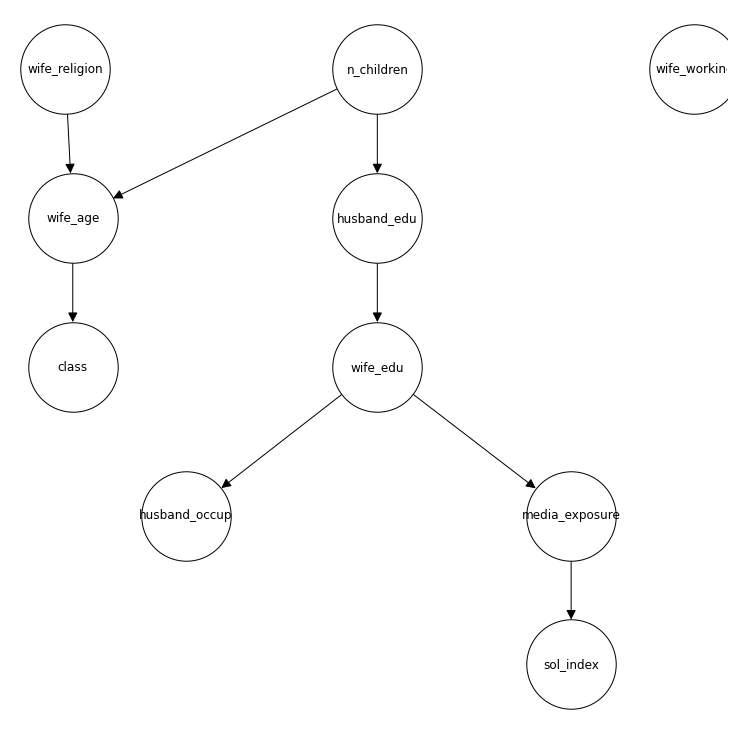

In [57]:
pc_est = PC(data=train_ds)
skeleton, separating_sets = pc_est.build_skeleton(variant='parallel')

hc = HillClimbSearch(
    data=train_ds, 
    scoring_method=BDeuScore(data=train_ds)
)

pchc_learned_model = hc.estimate(
    tabu_length=100, 
    white_list=skeleton.to_directed().edges()
)

utils.plot_network(pchc_learned_model)

## Test on chosen network

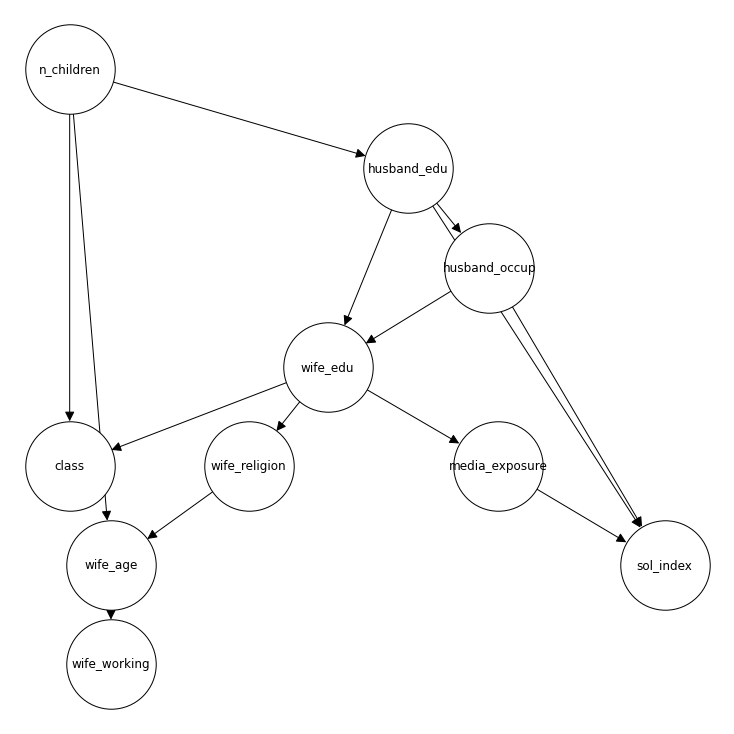

              precision    recall  f1-score   support

           1       0.49      0.80      0.61       126
           2       0.58      0.27      0.37        67
           3       0.42      0.24      0.30       102

    accuracy                           0.48       295
   macro avg       0.50      0.44      0.43       295
weighted avg       0.49      0.48      0.45       295



{'accuracy': 0.4847457627118644,
 'precision': 0.49654016606109325,
 'recall': 0.435179378550757,
 'f1': 0.425280112611649}

In [91]:
network = BayesianModel()
network.add_nodes_from(nodes)
network.add_edges_from(list(hc_own_networks[0].edges()))  # pchc_learned_model

utils.plot_network(network)

bn_model = BayesianNetworkModel(
    model=network
)

bn_model.fit(
    training_data=data['train']
)

# from IPython.utils import io
# with io.capture_output() as captured:
y_pred = bn_model.predict(X_test)

print(utils.get_classification_report(
    y_true=y_test,
    y_pred=y_pred
))

utils.get_metrics(
    y_true=y_test,
    y_pred=y_pred,
    average='macro'
)

## Run

In [ ]:
data = utils.load_data()
data = utils.split_data(data)

data_copy = deepcopy(data)

continuous_attrs = ['wife_age', 'n_children']
data = utils.discretize_data(
    data=data, 
    continuous_attrs=continuous_attrs,
    n_bins=5
)

X_train = data['train']['X']
y_train = data['train']['y']
X_test = data['test']['X']
y_test = data['test']['y']


for model_name, model in models: